### Importing libraries

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

### Importing datasets
There are three primary datasets:
1. *RAW_us_confirmed_cases.csv* : Contains information on confirmed US cases by county
2. *Mask_Mandates.csv* : State and territorial executive orders, administrative orders, resolutions, and proclamations collected from government websites
3. *mask_use_by_county.csv* : Estimates of mask usage by county in the United States \
All the datasets are contained in the `data` folder.

In [2]:
cases = pd.read_csv("../data/RAW_us_confirmed_cases.csv")
mask_use = pd.read_csv("../data/mask-use-by-county.csv")
mask_mandates = pd.read_csv("../data/Mask_Mandates.csv")

### Exploring the datasets

#### RAW_us_confirmed_cases

In [4]:
cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18480,18480,18480,18480,18511,18511,18511,18511,18511,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65895,65895,65895,65895,65973,65973,65973,65973,65973,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6926,6926,6926,6926,6930,6930,6930,6930,6930,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7560,7560,7560,7560,7575,7575,7575,7575,7575,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17286,17286,17286,17286,17320,17320,17320,17320,17320,17320


In [5]:
cases.shape

(3342, 1026)

In [7]:
cases.describe()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22
count,3.342000e+03,3342.000000,3332.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,...,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03
mean,8.342992e+07,834.494913,33043.078932,36.721617,-88.642045,0.000299,0.000299,0.000598,0.000598,0.001496,...,2.908554e+04,2.909686e+04,2.910946e+04,2.913042e+04,2.914742e+04,2.915586e+04,2.915845e+04,2.915938e+04,2.917267e+04,2.918355e+04
std,4.314076e+06,36.487378,18648.808931,9.079322,21.776287,0.017298,0.017298,0.024459,0.024459,0.038656,...,1.014803e+05,1.015513e+05,1.015881e+05,1.016417e+05,1.016848e+05,1.017154e+05,1.017199e+05,1.017218e+05,1.017851e+05,1.018112e+05
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.401811e+07,840.000000,19076.500000,33.896803,-97.803595,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.747250e+03,2.741500e+03,2.741500e+03,2.737750e+03,2.737750e+03,2.745000e+03,2.745000e+03,2.745000e+03,2.737750e+03,2.737750e+03
50%,8.402921e+07,840.000000,31012.000000,38.005610,-89.488865,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.289000e+03,7.289000e+03,7.292500e+03,7.296000e+03,7.298000e+03,7.299500e+03,7.299500e+03,7.299500e+03,7.315000e+03,7.317500e+03
75%,8.404612e+07,840.000000,47129.500000,41.579255,-82.313398,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.900250e+04,1.900250e+04,1.900250e+04,1.904375e+04,1.905050e+04,1.905050e+04,1.905050e+04,1.905050e+04,1.905200e+04,1.905200e+04
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.476928e+06,3.481103e+06,3.482181e+06,3.483444e+06,3.484615e+06,3.485787e+06,3.485787e+06,3.485787e+06,3.488288e+06,3.489106e+06


#### mask-use-by-county

In [8]:
mask_use.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [9]:
mask_use.shape

(3142, 6)

In [10]:
mask_use.describe()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,30383.649268,0.079940,0.082919,0.121318,0.207725,0.508094
std,15162.508374,0.058538,0.055464,0.058011,0.063571,0.152191
min,1001.000000,0.000000,0.000000,0.001000,0.029000,0.115000
25%,18177.500000,0.034000,0.040000,0.079000,0.164000,0.393250
50%,29176.000000,0.068000,0.073000,0.115000,0.204000,0.497000
75%,45080.500000,0.113000,0.115000,0.156000,0.247000,0.613750
max,56045.000000,0.432000,0.384000,0.422000,0.549000,0.889000


#### Mask_Mandates

In [11]:
mask_mandates.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [13]:
mask_mandates.shape

(1593869, 10)

In [14]:
mask_mandates.describe()

,FIPS_State,FIPS_County,order_code
count,1.593869e+06,1.593869e+06,1.593869e+06
mean,3.143582e+01,1.027046e+02,1.539415e+00
std,1.640763e+01,1.065462e+02,4.984442e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.900000e+01,3.500000e+01,1.000000e+00
50%,3.000000e+01,7.900000e+01,2.000000e+00
75%,4.600000e+01,1.330000e+02,2.000000e+00
max,7.800000e+01,8.400000e+02,2.000000e+00


### Filtering County
The county assigned to me is **Norfolk** in **Massachusetts** state. Filtering the datasets for data specific to this county:

In [17]:
norfolk = cases[(cases['Province_State']=='Massachusetts') & (cases['Admin2']=='Norfolk')]

In [18]:
norfolk.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22
1276,Massachusetts,Norfolk,84025021,US,USA,840,25021.0,US,42.160731,-71.205304,...,163315,163315,163315,163315,163951,163951,163951,163951,163951,163951


In [20]:
norfolk_mandates = mask_mandates[(mask_mandates['County_Name']=='Norfolk County')]

In [21]:
norfolk_mandates.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
326435,MA,Norfolk County,25,21,4/10/2020,2,NaN,NaN,NaN,NaN
326436,MA,Norfolk County,25,21,4/11/2020,2,NaN,NaN,NaN,NaN
326437,MA,Norfolk County,25,21,4/12/2020,2,NaN,NaN,NaN,NaN
326438,MA,Norfolk County,25,21,4/13/2020,2,NaN,NaN,NaN,NaN
326439,MA,Norfolk County,25,21,4/14/2020,2,NaN,NaN,NaN,NaN


In [22]:
norfolk_mandates.shape

(493, 10)

In [27]:
# The FIPS column in norfolk matches the Countyfp column in mask use
norfolk_mask_use = mask_use[mask_use['COUNTYFP']==25021]

In [28]:
norfolk_mask_use.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1227,25021,0.02,0.015,0.035,0.125,0.805


### Analyzing datasets
Now the datasets will be restructured to have Date column with all corresponding confirmed COVID cases.

In [103]:
norfolk_df = norfolk.melt(id_vars=list(norfolk.columns[0:11]), 
                          value_vars=list(norfolk.columns[11:]),
                          var_name = "Date", value_name="no_of_cases", ignore_index=True)

In [104]:
norfolk_df.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,no_of_cases
0,Massachusetts,Norfolk,84025021,US,USA,840,25021.0,US,42.160731,-71.205304,"Norfolk, Massachusetts, US",1/22/20,0
1,Massachusetts,Norfolk,84025021,US,USA,840,25021.0,US,42.160731,-71.205304,"Norfolk, Massachusetts, US",1/23/20,0
2,Massachusetts,Norfolk,84025021,US,USA,840,25021.0,US,42.160731,-71.205304,"Norfolk, Massachusetts, US",1/24/20,0
3,Massachusetts,Norfolk,84025021,US,USA,840,25021.0,US,42.160731,-71.205304,"Norfolk, Massachusetts, US",1/25/20,0
4,Massachusetts,Norfolk,84025021,US,USA,840,25021.0,US,42.160731,-71.205304,"Norfolk, Massachusetts, US",1/26/20,0


In [105]:
norfolk_df.shape

(1015, 13)

In [106]:
# converting the Date column to Pandas DateTime
norfolk_df["Date"] = pd.to_datetime(norfolk_df["Date"])

In [107]:
# subsetting the dataset to remove general information and contain only the date and confirmed cases information
norfolk_df = norfolk_df[norfolk_df.columns[11:]]

In [108]:
norfolk_df.head()

,Date,no_of_cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [109]:
# Setting the index of the dataframe to Date
norfolk_df = norfolk_df.set_index("Date", drop=False)

In [114]:
# Calculating the difference in cases to get the number of daily cases
norfolk_df['cases_diff'] = norfolk_df['no_of_cases'].diff()

In [115]:
norfolk_df.head()

,Date,no_of_cases,cases_diff
Date,,,
2020-01-22,2020-01-22,0,NaN
2020-01-23,2020-01-23,0,0.0
2020-01-24,2020-01-24,0,0.0
2020-01-25,2020-01-25,0,0.0
2020-01-26,2020-01-26,0,0.0


In [116]:
# Filling the NA values with 0
norfolk_df = norfolk_df.fillna(0.0)

Finding the number of non null values in Norfolk Mask Mandates and converting Nan to No.

In [43]:
norfolk_mandates.notna().sum()

State_Tribe_Territory            493
County_Name                      493
FIPS_State                       493
FIPS_County                      493
date                             493
order_code                       493
Face_Masks_Required_in_Public    467
Source_of_Action                 467
URL                              467
Citation                         467
dtype: int64

In [49]:
# Finding the count of the distinct values in Face_Masks_Required_in_Public column 
norfolk_mandates['Face_Masks_Required_in_Public'].value_counts()

Yes    388
No      79
Name: Face_Masks_Required_in_Public, dtype: int64

In [57]:
# Finding the count of the distinct values in Source_of_Action column 
norfolk_mandates['Source_of_Action'].value_counts()

Official    467
No           26
Name: Source_of_Action, dtype: int64

In [53]:
# Filling the NAN values with No
norfolk_mandates = norfolk_mandates.fillna("No")

In [54]:
norfolk_mandates.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
326435,MA,Norfolk County,25,21,4/10/2020,2,No,No,No,No
326436,MA,Norfolk County,25,21,4/11/2020,2,No,No,No,No
326437,MA,Norfolk County,25,21,4/12/2020,2,No,No,No,No
326438,MA,Norfolk County,25,21,4/13/2020,2,No,No,No,No
326439,MA,Norfolk County,25,21,4/14/2020,2,No,No,No,No


In [55]:
norfolk_mandates['Face_Masks_Required_in_Public'].value_counts()

Yes    388
No     105
Name: Face_Masks_Required_in_Public, dtype: int64

### Visualization

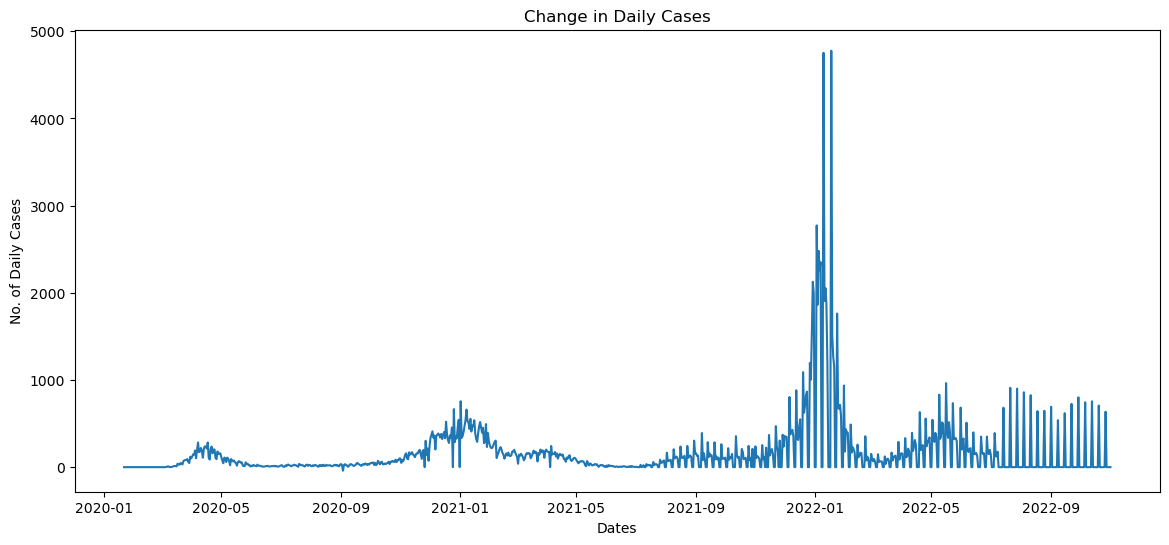

In [144]:
# Plotting the change in daily cases for the entire data
plt.figure(figsize=(14,6))
plt.plot(norfolk_df['cases_diff'])
plt.xlabel('Dates')
plt.ylabel('No. of Daily Cases')
plt.title('Change in Daily Cases')
plt.show()  

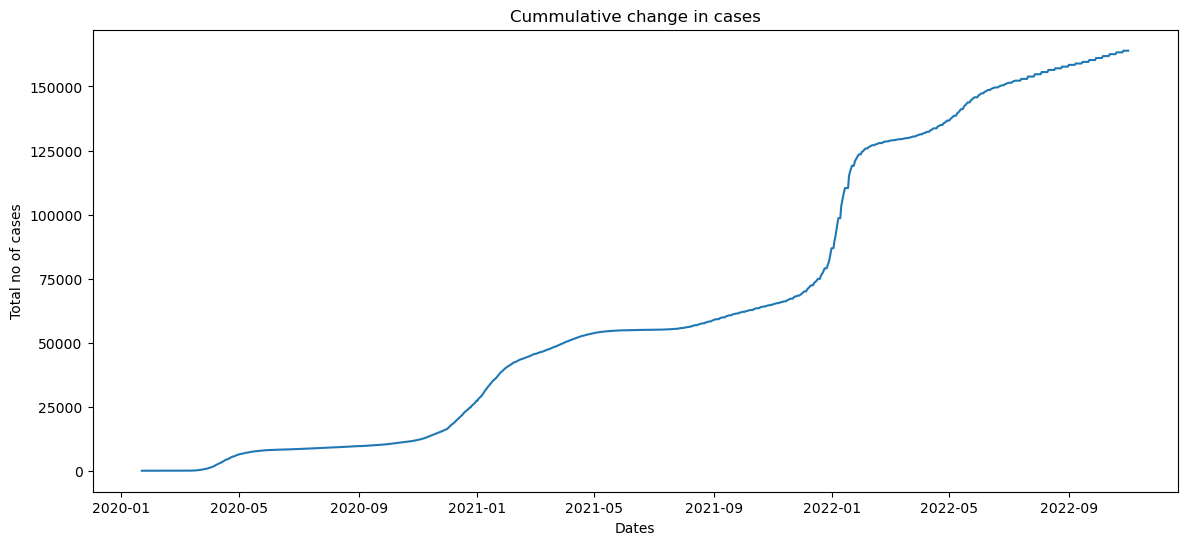

In [121]:
# Plotting the change in cummulative cases 
plt.figure(figsize=(14,6))
plt.plot(norfolk_df['no_of_cases'])
plt.xlabel('Dates')
plt.ylabel('Total no of cases')
plt.title('Cummulative change in cases')
plt.show()

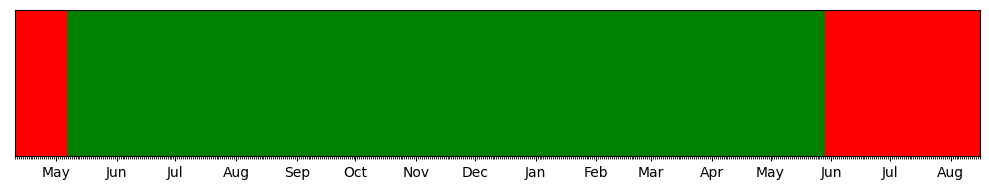

In [141]:
# Plotting the Masking Mandate Policies 
fig, ax = plt.subplots(figsize=(10,2))
masks_yes = norfolk_mandates[norfolk_mandates['Face_Masks_Required_in_Public']=="Yes"]
inxval = matplotlib.dates.date2num(pd.to_datetime(masks_yes.date))
times=list(zip(inxval, np.ones(len(masks_yes))))
plt.broken_barh(times, (-1,1), color = "green")

masks_no = norfolk_mandates[norfolk_mandates['Face_Masks_Required_in_Public']=="No"]
inxval = matplotlib.dates.date2num(pd.to_datetime(masks_no.date))
times=list(zip(inxval, np.ones(len(masks_no))))
plt.broken_barh(times, (-1,1), color = "red")

ax.margins(0)
ax.set_yticks([])
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%b"))
plt.tight_layout()
plt.show()

### How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 1, 2021?

Using the ruptures package to visualize the change point detection over masking policies with the number of confirmed cases.

In [146]:
new_df = norfolk_df[norfolk_df['Date'] < '2021-10-01']

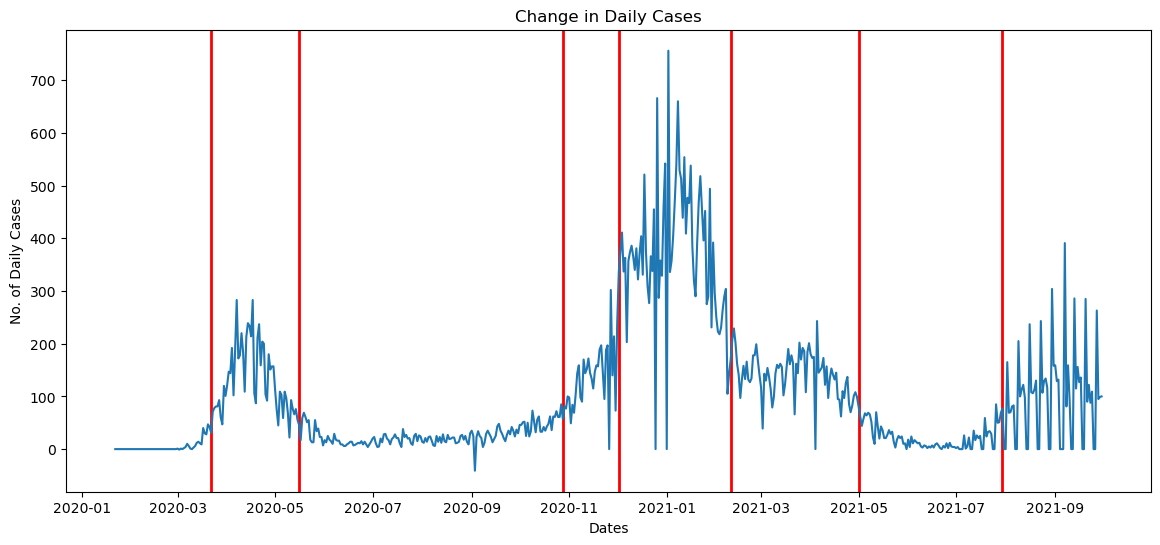

In [149]:
# Plotting change point detection in daily cases
points = np.array(new_df['cases_diff'])
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
result = norfolk_df.iloc[result[:-1]].index.to_list()
plt.figure(figsize=(14, 6))
for x in result:
    plt.axvline(x,lw=2, color='red')
#rpt.display(points, result)
plt.plot(new_df['cases_diff'])
plt.xlabel('Dates')
plt.ylabel('No. of Daily Cases')
plt.title('Change in Daily Cases')
plt.show()  

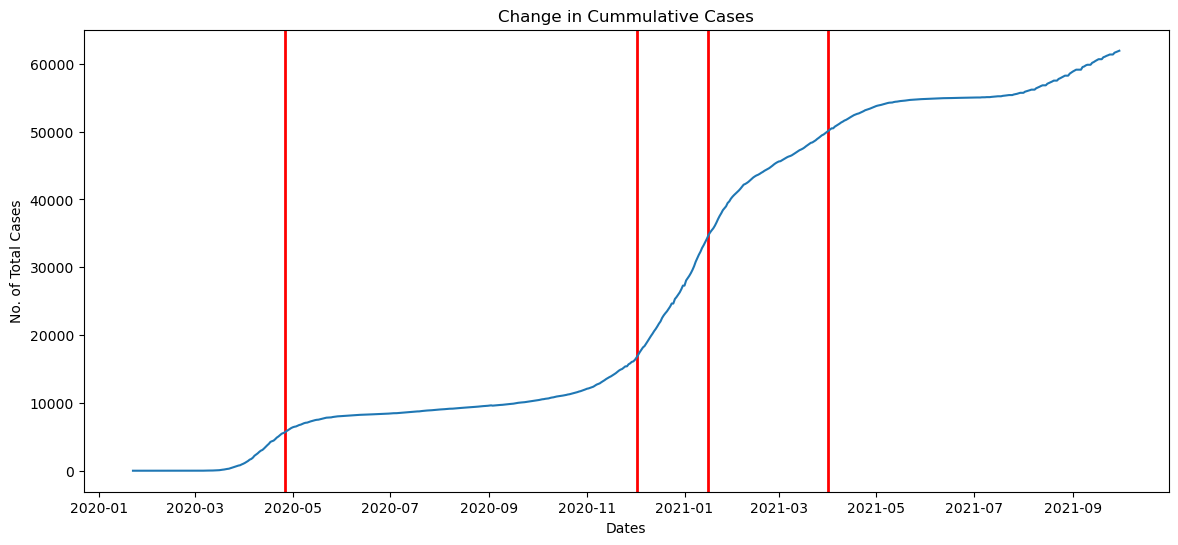

In [151]:
# Plotting change point detection in cummulative cases
points = np.array(new_df['no_of_cases'])
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
result = norfolk_df.iloc[result[:-1]].index.to_list()
plt.figure(figsize=(14, 6))
for x in result:
    plt.axvline(x,lw=2, color='red')
#rpt.display(points, result)
plt.plot(new_df['no_of_cases'])
plt.xlabel('Dates')
plt.ylabel('No. of Total Cases')
plt.title('Change in Cummulative Cases')
plt.show()  

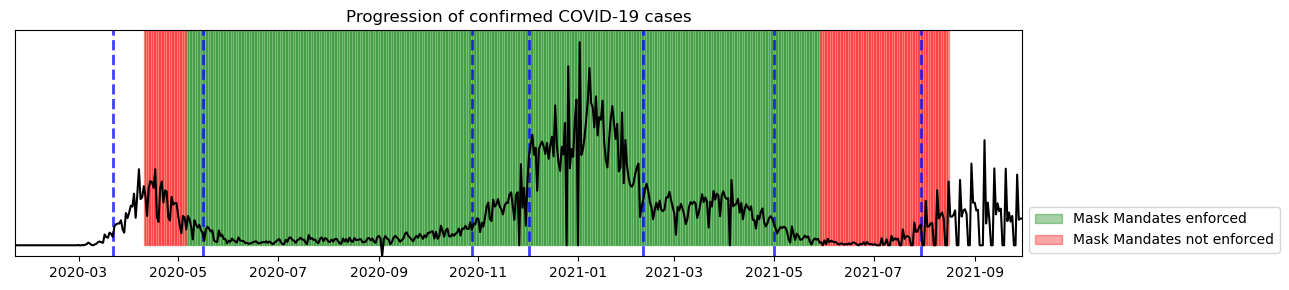

In [195]:
# Plotting change point detection in daily cases over the masking policies
fig, ax = plt.subplots(figsize=(13,3))
masks_yes = norfolk_mandates[norfolk_mandates['Face_Masks_Required_in_Public']=="Yes"]
inxval = matplotlib.dates.date2num(pd.to_datetime(masks_yes.date))
times=list(zip(inxval, np.ones(len(masks_yes))))
plt.broken_barh(times, (0, 800), color = "green", alpha = 0.35)

masks_no = norfolk_mandates[norfolk_mandates['Face_Masks_Required_in_Public']=="No"]
inxval = matplotlib.dates.date2num(pd.to_datetime(masks_no.date))
times=list(zip(inxval, np.ones(len(masks_no))))
plt.broken_barh(times, (0, 800), color = "red", alpha=0.35)

legend_drawn_flag = True
plt.legend(["Mask Mandates enforced", "Mask Mandates not enforced"], loc=0, bbox_to_anchor=(1.0, 0.25),
           frameon=legend_drawn_flag)

points = np.array(new_df['cases_diff'])
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
result = norfolk_df.iloc[result[:-1]].index.to_list()
for x in result:
    plt.axvline(x,lw=2, color='blue', linestyle = 'dashed', alpha = 0.75)
    
ax.margins(0)
ax.set_yticks([])
plt.plot(new_df['cases_diff'], color='black')
plt.title('Progression of confirmed COVID-19 cases')

plt.tight_layout()
plt.show()

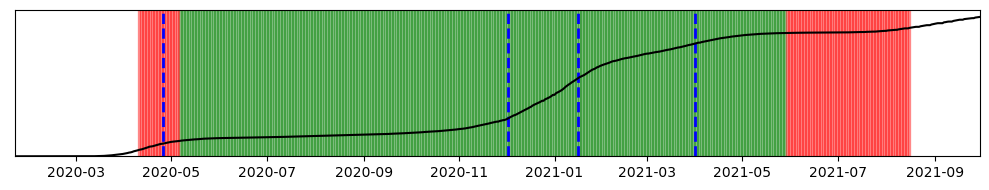

In [169]:
# Plotting change point detection in cummulative cases over the masking policies
fig, ax = plt.subplots(figsize=(10,2))
masks_yes = norfolk_mandates[norfolk_mandates['Face_Masks_Required_in_Public']=="Yes"]
inxval = matplotlib.dates.date2num(pd.to_datetime(masks_yes.date))
times=list(zip(inxval, np.ones(len(masks_yes))))
plt.broken_barh(times, (0, 65000), color = "green", alpha = 0.35)

masks_no = norfolk_mandates[norfolk_mandates['Face_Masks_Required_in_Public']=="No"]
inxval = matplotlib.dates.date2num(pd.to_datetime(masks_no.date))
times=list(zip(inxval, np.ones(len(masks_no))))
plt.broken_barh(times, (0, 65000), color = "red", alpha=0.35)

points = np.array(new_df['no_of_cases'])
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
result = norfolk_df.iloc[result[:-1]].index.to_list()
for x in result:
    plt.axvline(x,lw=2, color='blue', linestyle = 'dashed')
    
ax.margins(0)
ax.set_yticks([])
plt.plot(new_df['no_of_cases'], color='black')
plt.tight_layout()
plt.show()